In [1]:
from deepCR import deepCR
from astropy.io import fits
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt

import h5py
import numpy as np

In [2]:
f = h5py.File("../dolphin_lens_modelling_TODO/data/SDSSJ0819+4534/image_SDSSJ0819+4534_F435W.h5")

img =((f['image_data'][()]))
image = img*1000

In [3]:
# create an instance of deepCR with specified model configuration
mdl = deepCR(mask="ACS-WFC-F606W-2-32",    inpaint="ACS-WFC-F606W-2-32",  device="CPU")

# apply to input image
mask, cleaned_image = mdl.clean(image, threshold = 0.5)
# best threshold is highest value that generate mask covering full extent of CR
# choose threshold by visualizing outputs.



/home/s1/chinyi/.conda/envs/astroconda/lib/python3.7/site-packages/learned_models/mask/ACS-WFC-F606W-2-32.pth


In [4]:
mask2 = np.abs(1-mask)
mask2[mask2 == 0] = np.nan

In [5]:
from matplotlib import pyplot
import matplotlib as mpl


#plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
plt.rcParams["figure.figsize"] = (10,8)

/home/s1/chinyi/.conda/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("cubehelix"))
  after removing the cwd from sys.path.


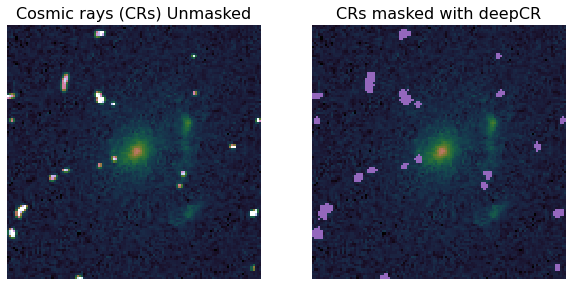

In [6]:
norm = simple_norm(image, 'sqrt', percent=99.5)

cmap = mpl.cm.get_cmap('cubehelix')
cmap.set_bad(color='tab:purple')


# First plot
plt.subplot(1, 2, 1)  # Create the first subplot
# Plot your data for the first plot
plt.imshow(image, norm=norm, origin='lower', cmap=cmap,interpolation='none')
plt.title('Cosmic rays (CRs) Unmasked',fontsize=16)
plt.axis('off')

# Second plot
plt.subplot(1, 2, 2)  # Create the second subplot
# Plot your data for the second plot
plt.imshow(image*mask2 , norm=norm, origin='lower', cmap=cmap,interpolation='none')
#plt.title(r'$CR masked with \textsc{deepCR}$',fontsize=16)
plt.title('CRs masked with deepCR',fontsize=16) # Use local computer for textsc
plt.axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2)

